Shannon Diversity

In [ ]:
# Load necessary libraries
library(vegan)      # for diversity
library(tidyverse)  # for data manipulation and plotting

# Read in the count data
counts <- read.table("ali_merged_counts.tsv", header = TRUE, sep = "\t", row.names = 1)

# Transpose if taxa are rows and samples are columns
genera_counts_t <- as.data.frame(t(counts))


Loading required package: permute

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
#list all of the row names in counts_t and sort
genera_counts_t <- genera_counts_t[order(rownames(genera_counts_t)), ]
# remove row garret_20 from counts_t
genera_counts_t <- genera_counts_t[!rownames(genera_counts_t) %in% "garrett_20", ]
# remove row garret_73 from counts_t
genera_counts_t <- genera_counts_t[!rownames(genera_counts_t) %in% "garrett_73", ]
row_names <- rownames(genera_counts_t)
#row_names

In [ ]:
# Shannon diversity for each sample
shannon_div <- diversity(genera_counts_t, index = "shannon")
# see the value of garrett_96 in shannon_div
#shannon_div

In [ ]:
meta <- read.table("sample_metadata.tsv", header = TRUE, sep = "\t")
names(shannon_div) <- sub("^X", "", names(shannon_div))
meta$sample <- trimws(meta$sample)


# Merge diversity and metadata
genera_diversity_df <- data.frame(sample = names(shannon_div), shannon = shannon_div)
genera_diversity_df <- merge(genera_diversity_df, meta, by = "sample")
meta$sample[meta$tissue == "Fecal" & meta$condition == "FMT" & meta$day == 56] # list samples that meet the condition
# save diversity_df to excel
write.table(genera_diversity_df, "shannon_diversity.tsv", sep = "\t", row.names = FALSE, quote = FALSE)
 


[1] "garrett_5"  "garrett_7"  "garrett_9"  "garrett_13" "garrett_15"
 [6] "garrett_19" "garrett_48" "25617X11"   "25617X18"   "25617X21"

In [ ]:
#names(shannon_div)

In [ ]:
# sum(genera_diversity_df$tissue == "Fecal" & genera_diversity_df$condition == "FMT" & genera_diversity_df$day == 56) # 6 samples
# # list samples that meet the condition
# healthy_fecal_samples <- genera_diversity_df$sample[genera_diversity_df$tissue == "Fecal" & genera_diversity_df$condition == "FMT" & genera_diversity_df$day == 56]
# healthy_fecal_samples
# genera_diversity_df[genera_diversity_df$sample %in% healthy_fecal_samples, ]

In [ ]:
# 6. Create a custom grouping: separate FMT by day, collapse Healthy into one group
genera_diversity_df <- genera_diversity_df %>%
  mutate(condition_day_group = case_when(
    condition == "FMT" & day == 0 ~ "Pre-FMT",
    condition == "Healthy"~ "Healthy",
    TRUE ~ paste0("FMT Day ", day))) %>%
  mutate(condition_day_group = factor(condition_day_group, 
                                      levels = c("Pre-FMT", "FMT Day 14", "FMT Day 56", "Healthy")))

# # # 7. Plot
# # ggplot(diversity_df, aes(x = condition_day_group, y = shannon, fill = condition)) +
# #   geom_boxplot() +
# #   theme_minimal() +
# #   labs(
# #     title = "Shannon Diversity: FMT by Day, All Healthy Combined",
# #     x = "Group",
# #     y = "Shannon Diversity"
# #   ) +
# #   theme(axis.text.x = element_text(angle = 45, hjust = 1))

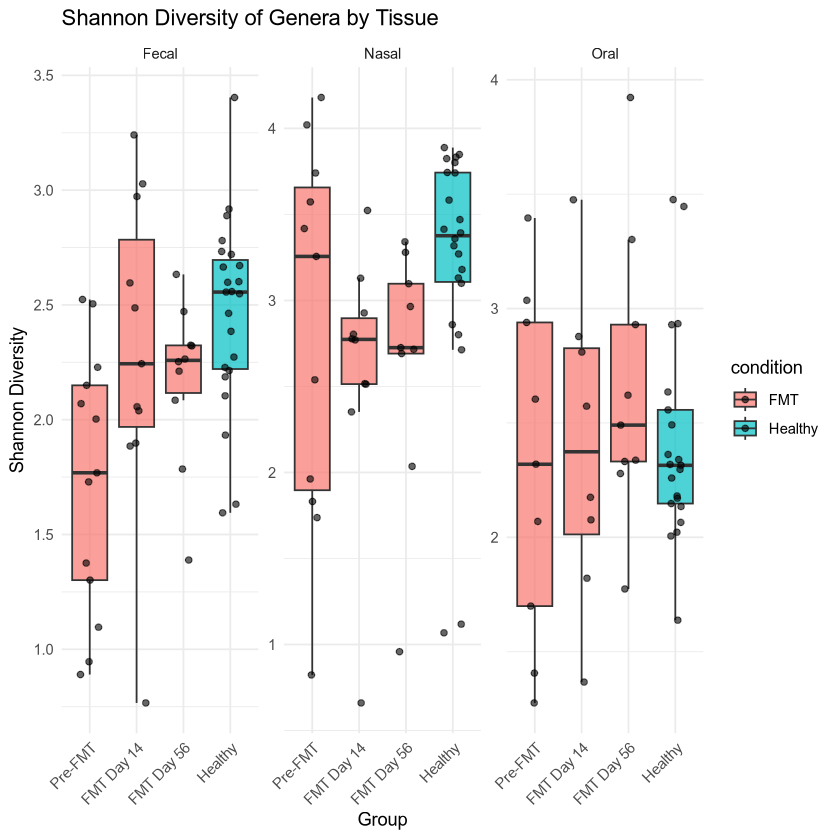

In [ ]:

# Ensure you have your data frame loaded (genera_diversity_df)

ggplot(genera_diversity_df, aes(x = condition_day_group, y = shannon, fill = condition)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.7) +
  geom_jitter( width = 0.2, alpha = 0.6, size = 1.5) +
  facet_wrap(~ tissue, scales = "free_y") +
  theme_minimal() +
  labs(
    title = "Shannon Diversity of Genera by Tissue",
    x = "Group",
    y = "Shannon Diversity"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

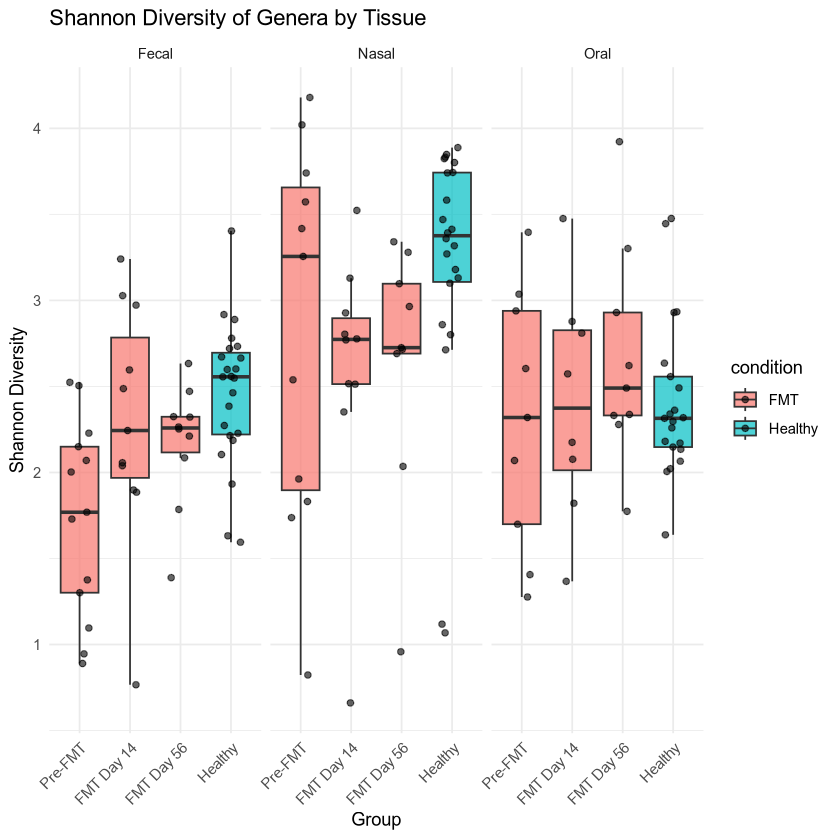

In [ ]:

# Ensure you have your data frame loaded (genera_diversity_df)

ggplot(genera_diversity_df, aes(x = condition_day_group, y = shannon, fill = condition)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.7) +
  geom_jitter( width = 0.2, alpha = 0.6, size = 1.5) +
  facet_wrap(~ tissue) +  # Removed the scales = "free_y" argument
  theme_minimal() +
  labs(
    title = "Shannon Diversity of Genera by Tissue",
    x = "Group",
    y = "Shannon Diversity"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

SHANNON DIVERSITY OF SPECIES

In [ ]:
# Load necessary libraries
library(vegan)      # for diversity
library(tidyverse)  # for data manipulation and plotting

# Clean file on the fly (remove single quotes)
counts <- read.table(pipe("sed \"s/'//g\" species_counts.tsv"),
                     header = TRUE, sep = "\t", row.names = 1)


# Transpose if taxa are rows and samples are columns
counts_t <- as.data.frame(t(counts))


In [ ]:
#list all of the row names in counts_t and sort
counts_t <- counts_t[order(rownames(counts_t)), ]
# remove row garret_20 from counts_t
counts_t <- counts_t[!rownames(counts_t) %in% "garrett_20", ]
# remove row garret_73 from counts_t
counts_t <- counts_t[!rownames(counts_t) %in% "garrett_73", ]
row_names <- rownames(counts_t)
#row_names

In [ ]:
# Shannon diversity for each sample
shannon_div <- diversity(counts_t, index = "shannon")
# see the value of garrett_96 in shannon_div
#shannon_div

In [ ]:
meta <- read.table("sample_metadata.tsv", header = TRUE, sep = "\t")
names(shannon_div) <- sub("^X", "", names(shannon_div))
meta$sample <- trimws(meta$sample)


# Merge diversity and metadata
diversity_df <- data.frame(sample = names(shannon_div), shannon = shannon_div)
diversity_df <- merge(diversity_df, meta, by = "sample")
meta$sample[meta$tissue == "Fecal" & meta$condition == "FMT" & meta$day == 56] # list samples that meet the condition
# save diversity_df to excel
write.table(diversity_df, "species_shannon_diversity.tsv", sep = "\t", row.names = FALSE, quote = FALSE)
 

[1] "garrett_5"  "garrett_7"  "garrett_9"  "garrett_13" "garrett_15"
 [6] "garrett_19" "garrett_48" "25617X11"   "25617X18"   "25617X21"

In [ ]:
#names(shannon_div)

In [ ]:
diversity_df <- diversity_df %>%
  mutate(condition_day_group = case_when(
    condition == "FMT" & day == 0 ~ "Pre-FMT",
    condition == "Healthy"~ "Healthy",
    TRUE ~ paste0("FMT Day ", day))) %>%
  mutate(condition_day_group = factor(condition_day_group, 
                                      levels = c("Pre-FMT", "FMT Day 14", "FMT Day 56", "Healthy")))


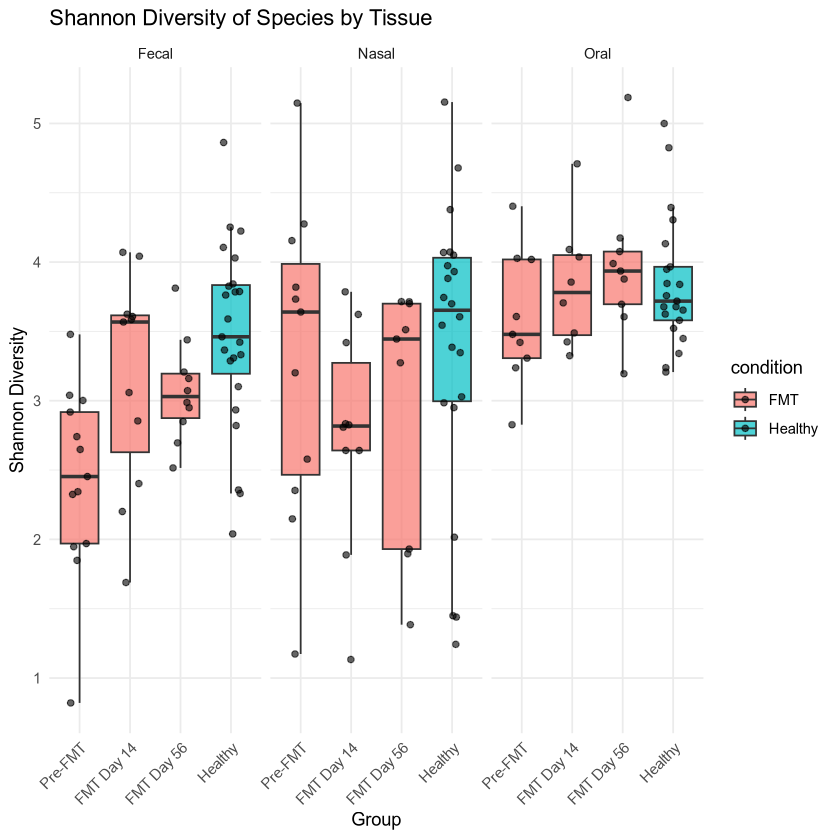

In [ ]:
# Ensure you have your data frame loaded (genera_diversity_df)

ggplot(diversity_df, aes(x = condition_day_group, y = shannon, fill = condition)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.7) +
  geom_jitter( width = 0.2, alpha = 0.6, size = 1.5) +
  facet_wrap(~ tissue) +  # Removed the scales = "free_y" argument
  theme_minimal() +
  labs(
    title = "Shannon Diversity of Species by Tissue",
    x = "Group",
    y = "Shannon Diversity"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

RICHNESS

In [ ]:
# Richness: number of nonzero taxa per sample
richness <- apply(genera_counts_t, 1, function(x) sum(x > 0))
richness
names(richness) <- sub("^X", "", names(richness))
meta$sample <- trimws(meta$sample)

# Log10 richness
log_richness <- log10(richness)

# Optionally: create a data frame and merge with metadata
genera_richness_df <- data.frame(sample = names(richness), richness = richness, log10_richness = log_richness)
genera_richness_df <- merge(genera_richness_df, meta, by = "sample")

write.table(genera_richness_df, "genera_richness.tsv", sep = "\t", row.names = FALSE, quote = FALSE)


garrett_1 garrett_10 garrett_11 garrett_12 garrett_13 garrett_14 garrett_15 
      1517       1062       1234       1625        849        187       1263 
garrett_16 garrett_17 garrett_18 garrett_19  garrett_2 garrett_21 garrett_22 
      1631        246        487       1272       1144       1196       1463 
garrett_23 garrett_24 garrett_25 garrett_26 garrett_27 garrett_28 garrett_29 
      1435       1548       1554       1334       1370       1451       1878 
 garrett_3 garrett_30 garrett_31 garrett_32 garrett_33 garrett_34 garrett_35 
      1434       1083        927       1653         81         95        719 
garrett_36 garrett_37 garrett_38 garrett_39  garrett_4 garrett_40 garrett_41 
       956         99        434        726        280        365        182 
garrett_42 garrett_43 garrett_44 garrett_45 garrett_46 garrett_47 garrett_48 
       122        781        134        180       1154        257       1244 
garrett_49  garrett_5 garrett_50 garrett_51 garrett_52 garrett_53 garrett_54 
       135        486        193        177        108        205         54 
garrett_55 garrett_56 garrett_57 garrett_58 garrett_59  garrett_6 garrett_60 
       105        114         93         62         87       1711        141 
garrett_61 garrett_62 garrett_63 garrett_64 garrett_65 garrett_66 garrett_67 
       195        436         36        163        149        388        564 
garrett_68 garrett_69  garrett_7 garrett_70 garrett_71 garrett_72 garrett_74 
       327         81       1451        372        234        644        119 
garrett_75 garrett_76 garrett_77 garrett_78 garrett_79  garrett_8 garrett_80 
        49        286       1388        378        135        294         58 
garrett_81 garrett_83 garrett_84 garrett_85 garrett_86 garrett_87 garrett_88 
        41         37         58        277        191        178        384 
garrett_89  garrett_9 garrett_90 garrett_91 garrett_92 garrett_93 garrett_94 
       178       1692         64        120        192         80        107 
garrett_95 garrett_96   X25617X1  X25617X10  X25617X11  X25617X12  X25617X13 
       319        409       2077       1328       1039       2022       2080 
 X25617X14  X25617X15  X25617X16  X25617X17  X25617X18  X25617X19   X25617X2 
       764       1952       2068       2215       2313       1299       2043 
 X25617X20  X25617X21  X25617X22  X25617X23  X25617X24  X25617X25  X25617X26 
      2025       1961        954       1564       1367       1158       1386 
 X25617X27  X25617X28  X25617X29   X25617X3  X25617X30  X25617X31  X25617X32 
      1208       1699       1368       2033        579        555        573 
 X25617X33  X25617X34  X25617X35  X25617X36  X25617X37  X25617X38  X25617X39 
      1208        748        699        680       1370        881        644 
  X25617X4  X25617X40  X25617X41  X25617X42  X25617X43  X25617X44  X25617X45 
      1945        788        577        560        279        235        407 
 X25617X46  X25617X47  X25617X48  X25617X49   X25617X5  X25617X50  X25617X51 
       447        287        327        401       1823        713        495 
 X25617X52  X25617X53  X25617X54  X25617X55  X25617X56  X25617X57  X25617X58 
       608        533        443        489        592        368        139 
 X25617X59   X25617X6  X25617X60  X25617X61  X25617X62  X25617X63   X25617X7 
       154       1972        138        258        303        246       2123 
  X25617X8   X25617X9 
      2110        776

In [ ]:
# 6. Create a custom grouping: separate FMT by day, collapse Healthy into one group
genera_richness_df <- genera_richness_df %>%
  mutate(condition_day_group = ifelse(condition == "Healthy", "Healthy_AllDays", paste0("FMT_day", day)))


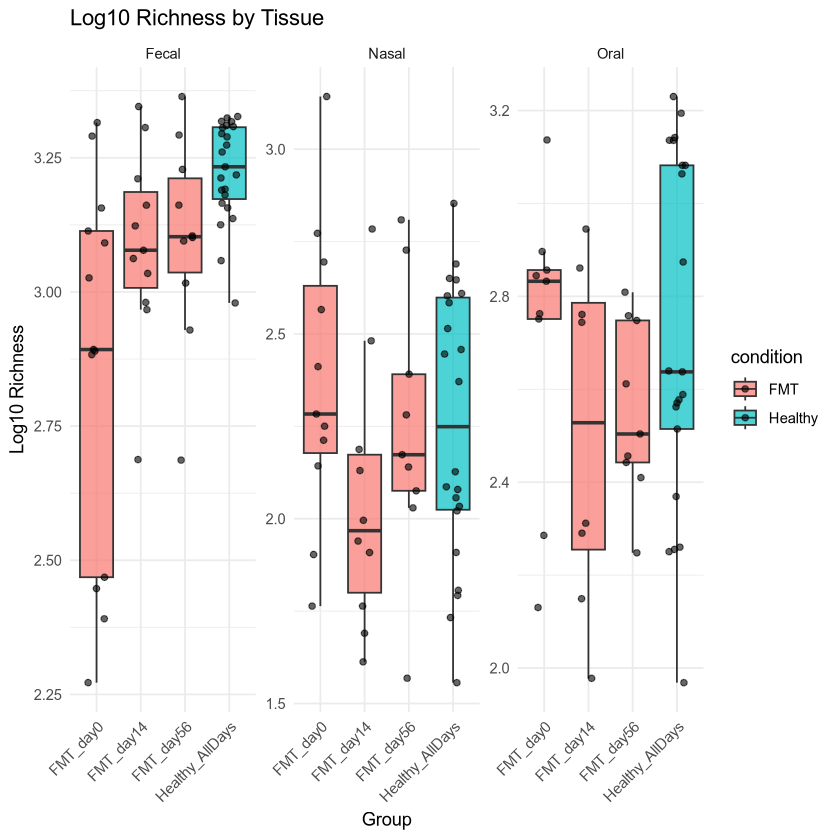

In [ ]:
ggplot(genera_richness_df, aes(x = condition_day_group, y = log10_richness, fill = condition)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.7) +  # Hide boxplot outliers to avoid clutter
  geom_jitter(width = 0.2, alpha = 0.6, size = 1.5) +  # Add jittered points
  facet_wrap(~ tissue, scales = "free_y") +
  theme_minimal() +
  labs(
    title = "Log10 Richness by Tissue",
    x = "Group",
    y = "Log10 Richness"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


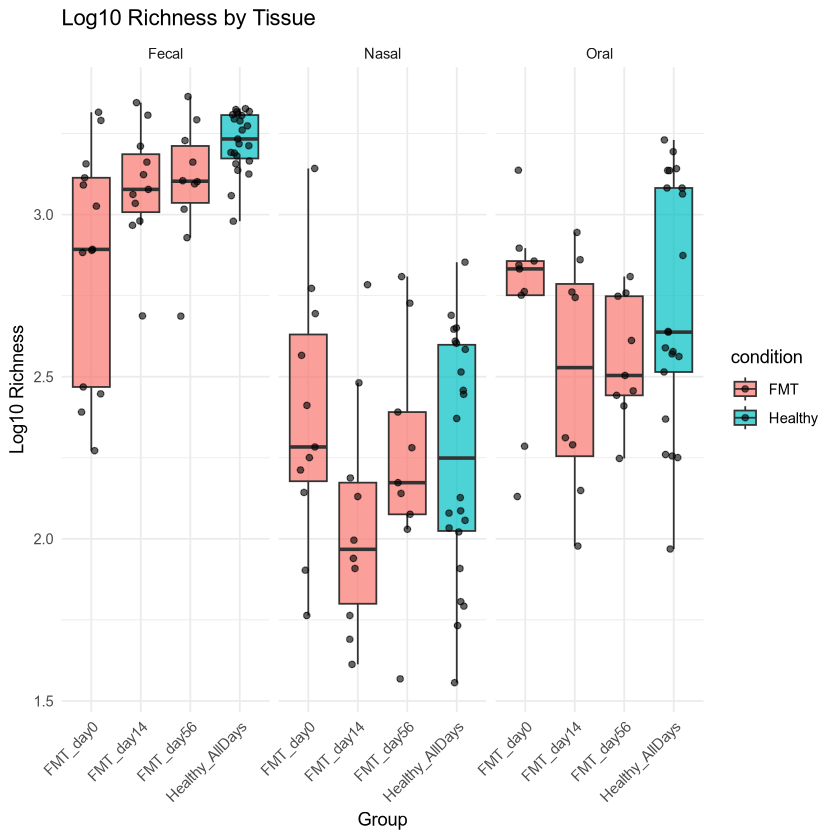

In [ ]:
ggplot(genera_richness_df, aes(x = condition_day_group, y = log10_richness, fill = condition)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.7) +  # Hide boxplot outliers to avoid clutter
  geom_jitter( width = 0.2, alpha = 0.6, size = 1.5) +  # Add jittered points
  facet_wrap(~ tissue) +
  theme_minimal() +
  labs(
    title = "Log10 Richness by Tissue",
    x = "Group",
    y = "Log10 Richness"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [ ]:
# 6. Create a custom grouping: separate FMT by day, collapse Healthy into one group
genera_richness_df <- genera_richness_df %>%
  mutate(condition_day_group = case_when(
    condition == "FMT" & day == 0 ~ "Pre-FMT",
    condition == "Healthy"~ "Healthy",
    TRUE ~ paste0("FMT Day ", day))) %>%
  mutate(condition_day_group = factor(condition_day_group, 
                                      levels = c("Pre-FMT", "FMT Day 14", "FMT Day 56", "Healthy")))

# # 7. Plot
# ggplot(diversity_df, aes(x = condition_day_group, y = shannon, fill = condition)) +
#   geom_boxplot() +
#   theme_minimal() +
#   labs(
#     title = "Shannon Diversity: FMT by Day, All Healthy Combined",
#     x = "Group",
#     y = "Shannon Diversity"
#   ) +
#   theme(axis.text.x = element_text(angle = 45, hjust = 1))

RICHNESS BY SPECIES

In [ ]:
# Richness: number of nonzero taxa per sample
richness <- apply(counts_t, 1, function(x) sum(x > 0))
#richness
names(richness) <- sub("^X", "", names(richness))
meta$sample <- trimws(meta$sample)

# Log10 richness
log_richness <- log10(richness)

# Optionally: create a data frame and merge with metadata
richness_df <- data.frame(sample = names(richness), richness = richness, log10_richness = log_richness)
richness_df <- merge(richness_df, meta, by = "sample")

write.table(richness_df, "species_richness.tsv", sep = "\t", row.names = FALSE, quote = FALSE)


In [ ]:
# 6. Create a custom grouping: separate FMT by day, collapse Healthy into one group
richness_df <- richness_df %>%
  mutate(condition_day_group = ifelse(condition == "Healthy", "Healthy_AllDays", paste0("FMT_day", day)))


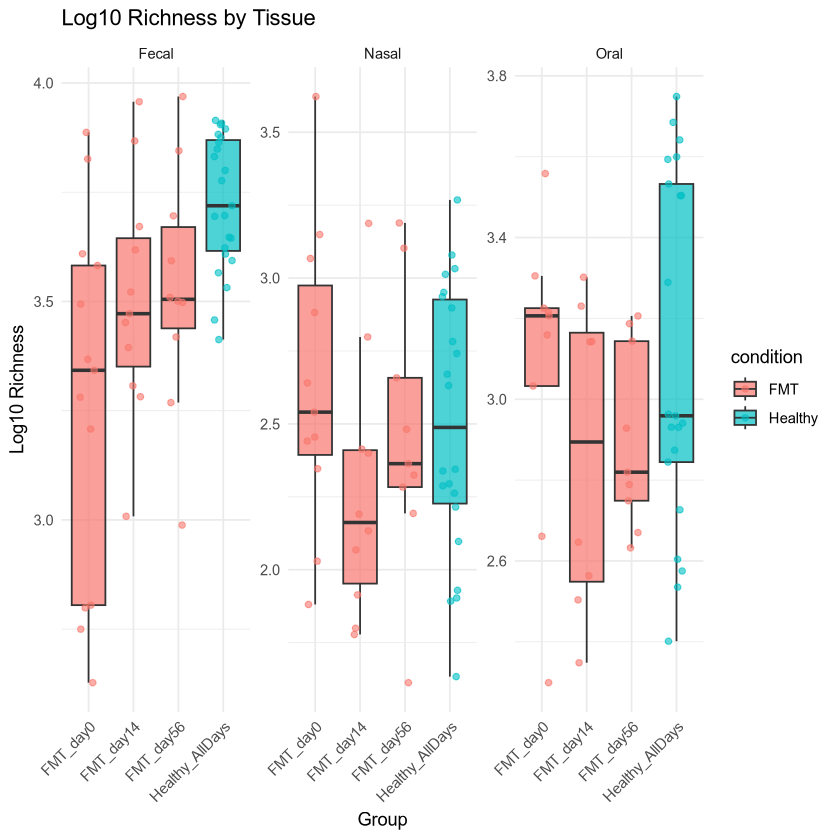

In [ ]:
ggplot(richness_df, aes(x = condition_day_group, y = log10_richness, fill = condition)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.7) +  # Hide boxplot outliers to avoid clutter
  geom_jitter(aes(color = condition), width = 0.2, alpha = 0.6, size = 1.5) +  # Add jittered points
  facet_wrap(~ tissue, scales = "free_y") +
  theme_minimal() +
  labs(
    title = "Log10 Richness by Tissue",
    x = "Group",
    y = "Log10 Richness"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [ ]:
# 6. Create a custom grouping: separate FMT by day, collapse Healthy into one group
richness_df <- richness_df %>%
  mutate(condition_day_group = case_when(
    condition == "FMT" & day == 0 ~ "Pre-FMT",
    condition == "Healthy"~ "Healthy",
    TRUE ~ paste0("FMT Day ", day))) %>%
  mutate(condition_day_group = factor(condition_day_group, 
                                      levels = c("Pre-FMT", "FMT Day 14", "FMT Day 56", "Healthy")))

# # 7. Plot
# ggplot(diversity_df, aes(x = condition_day_group, y = shannon, fill = condition)) +
#   geom_boxplot() +
#   theme_minimal() +
#   labs(
#     title = "Shannon Diversity: FMT by Day, All Healthy Combined",
#     x = "Group",
#     y = "Shannon Diversity"
#   ) +
#   theme(axis.text.x = element_text(angle = 45, hjust = 1))

DESEQ VOLCANO PLOTS

DDS Counts for Healthy Controls

In [ ]:

library(tidyverse)
library(DESeq2)
library(EnhancedVolcano)

# Load the data
counts_df <- read.csv("ali_merged_counts.tsv", sep='\t', row.names = 1)
metadata_df <- read.csv("sample_metadata.tsv", sep='\t', row.names = 1)

# Clean up sample names to ensure perfect matching
colnames(counts_df) <- gsub("^X", "", colnames(counts_df))
colnames(counts_df) <- trimws(colnames(counts_df))
rownames(metadata_df) <- trimws(rownames(metadata_df))

# Ensure data is in the correct format for DESeq2
counts_df <- as.matrix(counts_df)

# Filter for Fecal tissue and FMT condition
metadata_fecal <- metadata_df %>%
  filter(tissue == "Fecal") #%>%
  #filter(condition == 'FMT')

# Create a new column to group time points
metadata_fecal <- metadata_fecal %>%
  mutate(timepoint_group = case_when(
    condition == 'Healthy' ~ 'healthy-control',
    condition =='FMT' & day == 0 ~ "pre-fmt",
    condition =='FMT' & day == 14 | day == 56 ~ "post-fmt",
    .default = "other"
  )) %>%
  filter(timepoint_group %in% c('healthy-control', "pre-fmt", "post-fmt"))

counts_fecal <- counts_df[, rownames(metadata_fecal)]

# Remove taxa with zero counts across all samples
counts_fecal <- counts_fecal[rowSums(counts_fecal) > 0, ]

# Check that the sample order is the same
all(rownames(metadata_fecal) == colnames(counts_fecal))

# Create the DESeqDataSet object with the **CORRECTED** paired design
dds <- DESeqDataSetFromMatrix(countData = counts_fecal,
                              colData = metadata_fecal,
                              design = ~timepoint_group)

# Run the DESeq2 analysis
dds <- DESeq(dds)



[1] TRUE

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, an

In [ ]:
# Get normalized counts
normalized_counts <- counts(dds, normalized = TRUE)

# Calculate relative abundance (proportions that sum to 1 per sample)
relative_abundance <- sweep(normalized_counts, 2, colSums(normalized_counts), FUN = "/")

# Convert to percentages if you prefer
relative_abundance_pct <- relative_abundance * 100

#write csv
write.csv(relative_abundance_pct, "Fecal_Healthy_Relative_Abundance_Percentages.csv", row.names = TRUE)

FECAL PRE VS POST

In [ ]:

library(tidyverse)
library(DESeq2)
library(EnhancedVolcano)

# Load the data
counts_df <- read.csv("ali_merged_counts.tsv", sep='\t', row.names = 1)
metadata_df <- read.csv("sample_metadata.tsv", sep='\t', row.names = 1)

# Clean up sample names to ensure perfect matching
colnames(counts_df) <- gsub("^X", "", colnames(counts_df))
colnames(counts_df) <- trimws(colnames(counts_df))
rownames(metadata_df) <- trimws(rownames(metadata_df))

# Ensure data is in the correct format for DESeq2
counts_df <- as.matrix(counts_df)

# Filter for Oral tissue and FMT condition
metadata_fecal <- metadata_df %>%
  filter(tissue == "Fecal") %>%
  filter(condition == 'FMT')

# # Find the intersection of sample IDs to ensure only matching samples are kept
# common_samples <- intersect(colnames(counts_df), rownames(metadata_oral))

# # Filter both the counts and metadata to include only common samples
# counts_oral <- counts_df[, common_samples]
# metadata_oral <- metadata_oral[common_samples, ]

# Create a new column to group time points
metadata_fecal <- metadata_fecal %>%
  mutate(timepoint_group = case_when(
    day == 0 ~ "pre-fmt",
    day == 14 | day == 56 ~ "post-fmt",
    .default = "other"
  )) %>%
  filter(timepoint_group %in% c("pre-fmt", "post-fmt"))

# Filter to keep only donors who have samples in both pre-fmt and post-fmt groups
paired_donors <- metadata_fecal %>%
  group_by(donor) %>%
  summarize(unique_groups = n_distinct(timepoint_group)) %>%
  filter(unique_groups > 1)

metadata_fecal <- metadata_fecal %>%
  filter(donor %in% paired_donors$donor)

counts_fecal <- counts_df[, rownames(metadata_fecal)]

# Remove taxa with zero counts across all samples
counts_fecal <- counts_fecal[rowSums(counts_fecal) > 0, ]

# Check that the sample order is the same
all(rownames(metadata_fecal) == colnames(counts_fecal))

# Create the DESeqDataSet object with the **CORRECTED** paired design
dds <- DESeqDataSetFromMatrix(countData = counts_fecal,
                              colData = metadata_fecal,
                              design = ~donor + timepoint_group)

# Set the reference level for the comparison (pre-fmt)
dds$timepoint_group <- relevel(as.factor(dds$timepoint_group), ref = "pre-fmt")

# Run the DESeq2 analysis
dds <- DESeq(dds)

# Extract the results for post-fmt vs pre-fmt
res <- results(dds, contrast=c("timepoint_group", "post-fmt", "pre-fmt"))

# Convert results to a data frame and remove rows with missing values
res_df <- as.data.frame(res)
res_df <- res_df[complete.cases(res_df), ]
# write csv
write.csv(res_df, "Fecal_Genera_Volcano.csv", row.names = TRUE)

# # Save the differential abundance results to a CSV file
# write.csv(res_df, "Oral_Corrected_PostFMT_vs_PreFMT_DA_results.csv")

# Calculate the minimum and maximum log2FoldChange to set the x-axis limits
min_x <- min(res_df$log2FoldChange) 
max_x <- max(res_df$log2FoldChange) 

x_limits <- c(min_x, max_x)

max_y <- -log10(min(res_df$pvalue))
#max_y <- round(max_y, 0)

# Create the volcano plot
p <- EnhancedVolcano(
  res_df,
  lab = rownames(res_df),
  x = 'log2FoldChange',
  y = 'padj',
  title = 'Fecal Microbiome: Pre-FMT vs Post-FMT',
  pCutoff = 0.05,
  FCcutoff = 2.0,
  pointSize = 2.0,
  labSize = 5.0,
  legendPosition = 'right',
  caption = 'padj < 0.05, Log2 Fold Change > 2',
  colAlpha = 0.5,
  subtitle = NULL,
  ylim = c(0, max_y)
  #xlim = x_limits
)

# Save the plot as a PNG file
png("Fecal_Corrected_PostFMT_vs_PreFMT_Volcano_Plot.png", width = 800, height = 600)
print(p)
dev.off()

[1] TRUE

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is reco

agg_record_507143953 
                   2

In [ ]:
# Get normalized counts
normalized_counts <- counts(dds, normalized = TRUE)

# Convert to data frame for easier manipulation
normalized_counts_df <- as.data.frame(normalized_counts)

# Add metadata information (including original day values) to see timepoints
counts_with_metadata <- t(normalized_counts_df)  # transpose so samples are rows
counts_with_metadata <- as.data.frame(counts_with_metadata)

# Add the original day and timepoint_group columns from metadata
counts_with_metadata$day <- metadata_fecal[rownames(counts_with_metadata), "day"]
counts_with_metadata$timepoint_group <- metadata_fecal[rownames(counts_with_metadata), "timepoint_group"]
counts_with_metadata$donor <- metadata_fecal[rownames(counts_with_metadata), "donor"]

# Save with timepoint info
#write.csv(counts_with_metadata, "Fecal_Normalized_Counts_With_Timepoints.csv", row.names = TRUE)

In [ ]:
# Get normalized counts
normalized_counts <- counts(dds, normalized = TRUE)

# Calculate relative abundance (proportions that sum to 1 per sample)
relative_abundance <- sweep(normalized_counts, 2, colSums(normalized_counts), FUN = "/")

# Convert to percentages if you prefer
relative_abundance_pct <- relative_abundance * 100

#write csv
write.csv(relative_abundance_pct, "Fecal_Genera_Relative_Abundance_Percentages.csv", row.names = TRUE)

Individual Fecal FMT Genera

In [ ]:

# Load files
counts_df <- read.csv("ali_merged_counts.tsv", sep="\t", row.names=1)
metadata_df <- read.csv("sample_metadata.tsv", sep="\t", row.names=1)

# Make sure names match
colnames(counts_df) <- gsub("^X", "", colnames(counts_df))
colnames(counts_df) <- trimws(colnames(counts_df))
rownames(metadata_df) <- trimws(rownames(metadata_df))

# Keep only fecal FMT samples
metadata_fecal <- metadata_df %>%
  filter(tissue == "Fecal", condition == "FMT") %>%
  mutate(timepoint_group = case_when(
    day == 0  ~ "pre-fmt",
    day == 14 ~ "day14",
    day == 56 ~ "day56",
    .default  = NA_character_
  )) %>%
  filter(!is.na(timepoint_group))

# Order factor
metadata_fecal$timepoint_group <- factor(
  metadata_fecal$timepoint_group,
  levels = c("pre-fmt","day14","day56")
)

# Filter counts to matching samples
counts_fecal <- counts_df[, rownames(metadata_fecal)]


In [ ]:
# Relative abundance per sample (divide each sample by its column sum)
rel_abund <- sweep(counts_fecal, 2, colSums(counts_fecal), "/") * 100

# Make long-format dataframe
rel_abund_long <- rel_abund %>%
  as.data.frame() %>%
  rownames_to_column("taxa") %>%
  pivot_longer(-taxa, names_to="sample", values_to="rel_abundance") %>%
  left_join(metadata_fecal %>% rownames_to_column("sample"), by="sample")


In [ ]:
# write rel_abund_long to a csv file
write.csv(rel_abund_long, "Fecal_Relative_Abundance_Long.csv", row.names=FALSE)

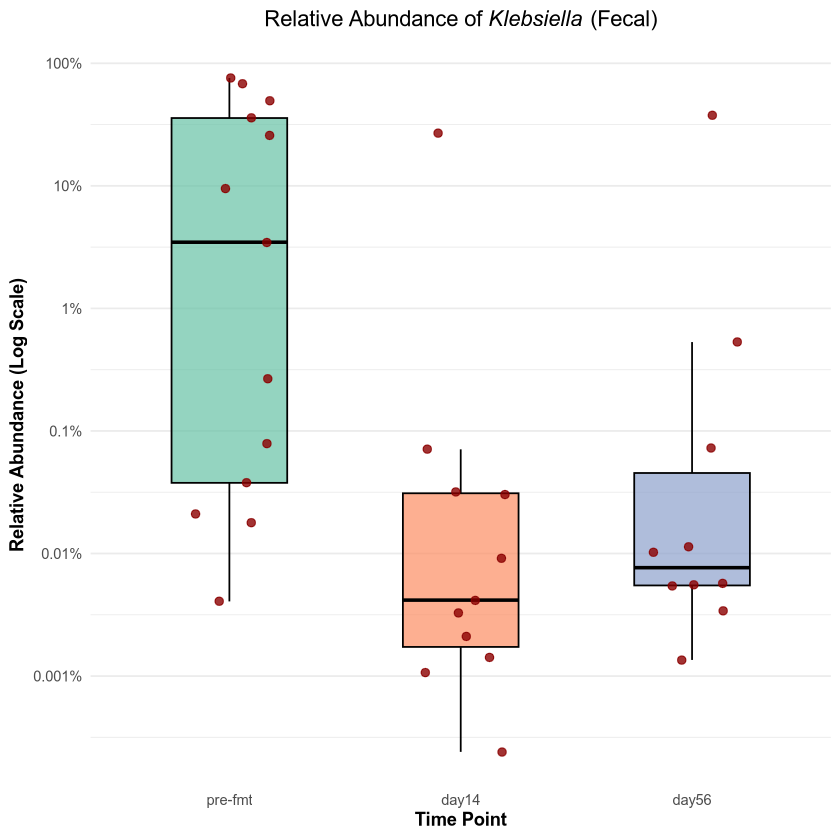

In [ ]:
# Filter for the relevant taxon (Klebsiella) and ensure Day_Label is a factor for plotting
df_klebsiella <- rel_abund_long %>%
  filter(taxa == "Klebsiella") %>%
  filter(rel_abundance > 0)  # Remove zero values for log scale
  

# --- 2. Generate the Box Plot with Log Scale ---

# Define the custom log breaks and labels for the y-axis (similar to the image you provided)
# Using 1e-4 as the minimum to ensure the lowest data point (0.0002%) is visible
y_breaks <- c(0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100)
y_labels <- c("1e-7%", "1e-6%", "1e-5%", "1e-4%", "0.001%", "0.01%", "0.1%", "1%", "10%", "100%")

plot <- ggplot(df_klebsiella, aes(x = timepoint_group, y = rel_abundance +1e-6)) +
  
  # 1. Add Box Plots
  # Use an outline color and fill color
  geom_boxplot(
    outlier.shape = NA, # Hide default outliers to use the jittered points
    aes(fill = timepoint_group), # Fill color based on timepoint
    color = "black", 
    alpha = 0.7,
    width = 0.5
  ) +
  
  # 2. Add Jittered Data Points
  # Shows the individual abundance value for each sample, similar to the reference plot
  geom_point(
    position = position_jitter(width = 0.2, seed = 42), # Add slight horizontal jitter
    size = 2, 
    color = "darkred", 
    alpha = 0.8
  ) +
  
  # 3. Apply Logarithmic Y-Scale
  scale_y_continuous(
    trans = 'log10', # Use log10 transformation
    breaks = y_breaks, 
    labels = y_labels,
    #limits = c(min(y_breaks), max(y_breaks)) # Set limits for the log scale
  ) +
  
  # 4. Customizing Aesthetics and Labels
  scale_fill_brewer(palette = "Set2") + # Use a pleasant color palette
  labs(
    title = expression(paste("Relative Abundance of ", italic("Klebsiella"), " (Fecal)")), # Use expression for italics
    x = "Time Point", 
    y = "Relative Abundance (Log Scale)",
    fill = "Time Point"
  ) +
  
  # 5. Apply a Clean Theme
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    axis.title.x = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold"),
    panel.grid.major.x = element_blank(), # Remove vertical grid lines
    legend.position = "none" # Hide the legend since the x-axis labels are clear
  )

plot

Fecal Healthy Species DDS Counts

In [ ]:

library(tidyverse)
library(DESeq2)
library(EnhancedVolcano)

# Load the data
counts_df <- read.csv("species_counts.tsv", sep='\t', row.names = 1)
metadata_df <- read.csv("sample_metadata.tsv", sep='\t', row.names = 1)

# Clean up sample names to ensure perfect matching
colnames(counts_df) <- gsub("^X", "", colnames(counts_df))
colnames(counts_df) <- trimws(colnames(counts_df))
rownames(metadata_df) <- trimws(rownames(metadata_df))

# Ensure data is in the correct format for DESeq2
counts_df <- as.matrix(counts_df)

# Filter for Oral tissue and FMT condition
metadata_fecal <- metadata_df %>%
  filter(tissue == "Fecal") #%>%
  #filter(condition == 'FMT')


# Create a new column to group time points
metadata_fecal <- metadata_fecal %>%
  mutate(timepoint_group = case_when(
    condition == 'Healthy' ~ 'healthy-control',
    condition =='FMT' & day == 0 ~ "pre-fmt",
    condition =='FMT' & day == 14 | day == 56 ~ "post-fmt",
    .default = "other"
  )) %>%
  filter(timepoint_group %in% c('healthy-control', "pre-fmt", "post-fmt"))



counts_fecal <- counts_df[, rownames(metadata_fecal)]

# Remove taxa with zero counts across all samples
counts_fecal <- counts_fecal[rowSums(counts_fecal) > 0, ]

# Check that the sample order is the same
all(rownames(metadata_fecal) == colnames(counts_fecal))

# Create the DESeqDataSet object with the **CORRECTED** paired design
dds <- DESeqDataSetFromMatrix(countData = counts_fecal,
                              colData = metadata_fecal,
                              design = ~timepoint_group)



# Run the DESeq2 analysis
dds <- DESeq(dds)



[1] TRUE

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is reco

In [ ]:
# Get normalized counts
normalized_counts <- counts(dds, normalized = TRUE)

# Calculate relative abundance (proportions that sum to 1 per sample)
relative_abundance <- sweep(normalized_counts, 2, colSums(normalized_counts), FUN = "/")

# Convert to percentages if you prefer
relative_abundance_pct <- relative_abundance * 100

#write csv 
write.csv(relative_abundance_pct, "Fecal_Healthy_Species_Relative_Abundance.csv", row.names=TRUE)

FECAL SPECIES VOLCANO

In [ ]:

library(tidyverse)
library(DESeq2)
library(EnhancedVolcano)

# Load the data
counts_df <- read.csv("species_counts.tsv", sep='\t', row.names = 1)
metadata_df <- read.csv("sample_metadata.tsv", sep='\t', row.names = 1)

# Clean up sample names to ensure perfect matching
colnames(counts_df) <- gsub("^X", "", colnames(counts_df))
colnames(counts_df) <- trimws(colnames(counts_df))
rownames(metadata_df) <- trimws(rownames(metadata_df))

# Ensure data is in the correct format for DESeq2
counts_df <- as.matrix(counts_df)

# Filter for Oral tissue and FMT condition
metadata_fecal <- metadata_df %>%
  filter(tissue == "Fecal") %>%
  filter(condition == 'FMT')

# # Find the intersection of sample IDs to ensure only matching samples are kept
# common_samples <- intersect(colnames(counts_df), rownames(metadata_oral))

# # Filter both the counts and metadata to include only common samples
# counts_oral <- counts_df[, common_samples]
# metadata_oral <- metadata_oral[common_samples, ]

# Create a new column to group time points
metadata_fecal <- metadata_fecal %>%
  mutate(timepoint_group = case_when(
    day == 0 ~ "pre-fmt",
    day == 14 | day == 56 ~ "post-fmt",
    .default = "other"
  )) %>%
  filter(timepoint_group %in% c("pre-fmt", "post-fmt"))

# Filter to keep only donors who have samples in both pre-fmt and post-fmt groups
paired_donors <- metadata_fecal %>%
  group_by(donor) %>%
  summarize(unique_groups = n_distinct(timepoint_group)) %>%
  filter(unique_groups > 1)

metadata_fecal <- metadata_fecal %>%
  filter(donor %in% paired_donors$donor)

counts_fecal <- counts_df[, rownames(metadata_fecal)]

# Remove taxa with zero counts across all samples
counts_fecal <- counts_fecal[rowSums(counts_fecal) > 0, ]

# Check that the sample order is the same
all(rownames(metadata_fecal) == colnames(counts_fecal))

# Create the DESeqDataSet object with the **CORRECTED** paired design
dds <- DESeqDataSetFromMatrix(countData = counts_fecal,
                              colData = metadata_fecal,
                              design = ~donor + timepoint_group)

# Set the reference level for the comparison (pre-fmt)
dds$timepoint_group <- relevel(as.factor(dds$timepoint_group), ref = "pre-fmt")

# Run the DESeq2 analysis
dds <- DESeq(dds)

# Extract the results for post-fmt vs pre-fmt
res <- results(dds, contrast=c("timepoint_group", "post-fmt", "pre-fmt"))

# Convert results to a data frame and remove rows with missing values
res_df <- as.data.frame(res)
res_df <- res_df[complete.cases(res_df), ]

# Save the differential abundance results to a CSV file for plotting
write.csv(res_df, "Fecal_Species_DA_Volcano_Data.csv", row.names = TRUE)

# # Save the differential abundance results to a CSV file
# write.csv(res_df, "Oral_Corrected_PostFMT_vs_PreFMT_DA_results.csv")

# Create the volcano plot
p <- EnhancedVolcano(
  res_df,
  lab = rownames(res_df),
  x = 'log2FoldChange',
  y = 'padj',
  title = 'Fecal Microbiome (Species): Post-FMT vs Pre-FMT',
  pCutoff = 0.05,
  FCcutoff = 2.0,
  pointSize = 2.0,
  labSize = 3.0,
  legendPosition = 'right',
  caption = 'padj < 0.05, Log2 Fold Change > 2',
  colAlpha = 0.5,
  subtitle = NULL
)

# Save the plot as a PNG file
png("Fecal_Species_PostFMT_vs_PreFMT_Volcano_Plot.png", width = 800, height = 600)
print(p)
dev.off()

[1] TRUE

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is reco

agg_record_543099014 
                   2

In [ ]:
# Get normalized counts
normalized_counts <- counts(dds, normalized = TRUE)

# Calculate relative abundance (proportions that sum to 1 per sample)
relative_abundance <- sweep(normalized_counts, 2, colSums(normalized_counts), FUN = "/")

# Convert to percentages if you prefer
relative_abundance_pct <- relative_abundance * 100

In [ ]:
#write relative abundance to a CSV file
write.csv(relative_abundance_pct, "Fecal_Species_Relative_Abundance.csv", row.names=TRUE)

Healthy DDS counts Nasal

In [ ]:

library(tidyverse)
library(DESeq2)
library(EnhancedVolcano)

# Load the data
counts_df <- read.csv("ali_merged_counts.tsv", sep='\t', row.names = 1)
metadata_df <- read.csv("sample_metadata.tsv", sep='\t', row.names = 1)

# Clean up sample names to ensure perfect matching
colnames(counts_df) <- gsub("^X", "", colnames(counts_df))
colnames(counts_df) <- trimws(colnames(counts_df))
rownames(metadata_df) <- trimws(rownames(metadata_df))
metadata_df <- metadata_df[rownames(metadata_df) != "garrett_82", ]


# Ensure data is in the correct format for DESeq2
counts_df <- as.matrix(counts_df)

# Filter for Oral tissue and FMT condition
metadata_fecal <- metadata_df %>%
  filter(tissue == "Nasal") #%>%
  #filter(condition == 'FMT')



# Create a new column to group time points
metadata_fecal <- metadata_fecal %>%
  mutate(timepoint_group = case_when(
    condition == 'Healthy' ~ 'healthy-control',
    condition =='FMT' & day == 0 ~ "pre-fmt",
    condition =='FMT' & day == 14 | day == 56 ~ "post-fmt",
    .default = "other"
  )) %>%
  filter(timepoint_group %in% c('healthy-control', "pre-fmt", "post-fmt"))



counts_fecal <- counts_df[, rownames(metadata_fecal)]

# Remove taxa with zero counts across all samples
counts_fecal <- counts_fecal[rowSums(counts_fecal) > 0, ]

# Check that the sample order is the same
all(rownames(metadata_fecal) == colnames(counts_fecal))

# Create the DESeqDataSet object with the **CORRECTED** paired design
dds <- DESeqDataSetFromMatrix(countData = counts_fecal,
                              colData = metadata_fecal,
                              design = ~timepoint_group)


# Run the DESeq2 analysis
dds <- DESeq(dds)



[1] TRUE

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is reco

In [ ]:
# Get normalized counts
normalized_counts <- counts(dds, normalized = TRUE)

# Calculate relative abundance (proportions that sum to 1 per sample)
relative_abundance <- sweep(normalized_counts, 2, colSums(normalized_counts), FUN = "/")

# Convert to percentages if you prefer
relative_abundance_pct <- relative_abundance * 100

#write csv
write.csv(relative_abundance_pct, "Nasal_Healthy_Genera_Relative_Abundance_Percentages.csv", row.names = TRUE)

Nasal PRE VS POST FMT

In [ ]:

library(tidyverse)
library(DESeq2)
library(EnhancedVolcano)

# Load the data
counts_df <- read.csv("ali_merged_counts.tsv", sep='\t', row.names = 1)
metadata_df <- read.csv("sample_metadata.tsv", sep='\t', row.names = 1)
# remove garrett_82 from metadata_df
metadata_df <- metadata_df[rownames(metadata_df) != "garrett_82", ]

# Clean up sample names to ensure perfect matching
colnames(counts_df) <- gsub("^X", "", colnames(counts_df))
colnames(counts_df) <- trimws(colnames(counts_df))
rownames(metadata_df) <- trimws(rownames(metadata_df))

# Ensure data is in the correct format for DESeq2
counts_df <- as.matrix(counts_df)

# Filter for Oral tissue and FMT condition
metadata_nasal <- metadata_df %>%
  filter(tissue == "Nasal") %>%
  filter(condition == 'FMT')


# Create a new column to group time points
metadata_nasal <- metadata_nasal %>%
  mutate(timepoint_group = case_when(
    day == 0 ~ "pre-fmt",
    day == 14 | day == 56 ~ "post-fmt",
    .default = "other"
  )) %>%
  filter(timepoint_group %in% c("pre-fmt", "post-fmt"))

# Filter to keep only donors who have samples in both pre-fmt and post-fmt groups
paired_donors <- metadata_nasal %>%
  group_by(donor) %>%
  summarize(unique_groups = n_distinct(timepoint_group)) %>%
  filter(unique_groups > 1)

metadata_nasal <- metadata_nasal %>%
  filter(donor %in% paired_donors$donor)

counts_nasal <- counts_df[, rownames(metadata_nasal)]

# Remove taxa with zero counts across all samples
counts_nasal <- counts_nasal[rowSums(counts_nasal) > 0, ]

# Check that the sample order is the same
all(rownames(metadata_nasal) == colnames(counts_nasal))

# Create the DESeqDataSet object with the **CORRECTED** paired design
dds <- DESeqDataSetFromMatrix(countData = counts_nasal,
                              colData = metadata_nasal,
                              design = ~donor + timepoint_group)

# Set the reference level for the comparison (pre-fmt)
dds$timepoint_group <- relevel(as.factor(dds$timepoint_group), ref = "pre-fmt")

# Run the DESeq2 analysis
dds <- DESeq(dds)

# Extract the results for post-fmt vs pre-fmt
res <- results(dds, contrast=c("timepoint_group", "post-fmt", "pre-fmt"))

# Convert results to a data frame and remove rows with missing values
res_df <- as.data.frame(res)
res_df <- res_df[complete.cases(res_df), ]
#write csv
write.csv(res_df, "Nasal_Genera_Volcano.csv", row.names = TRUE)


# # Save the differential abundance results to a CSV file
# write.csv(res_df, "Oral_Corrected_PostFMT_vs_PreFMT_DA_results.csv")
max_y <- -log10(min(res_df$pvalue))
#max_y <- round(max_y, 0)
# Calculate the minimum and maximum log2FoldChange to set the x-axis limits
min_x <- min(res_df$log2FoldChange) 
max_x <- max(res_df$log2FoldChange) 

x_limits <- c(min_x, max_x)
# Create the volcano plot
p <- EnhancedVolcano(
  res_df,
  lab = rownames(res_df),
  x = 'log2FoldChange',
  y = 'padj',
  title = 'Nasal Microbiome: Pre-FMT vs Post-FMT',
  pCutoff = 0.05,
  FCcutoff = 2.0,
  pointSize = 2.0,
  labSize = 5.0,
  legendPosition = 'right',
  caption = 'padj < 0.05, Log2 Fold Change > 2',
  colAlpha = 0.5,
  subtitle = NULL,
  ylim = c(0, max_y )
  #xlim = x_limits
)

# Save the plot as a PNG file
png("Nasal_Corrected_PostFMT_vs_PreFMT_Volcano_Plot.png", width = 800, height = 600)
print(p)
dev.off()

[1] TRUE

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is reco

agg_record_2050775282 
                    2

In [ ]:
# Get normalized counts
normalized_counts <- counts(dds, normalized = TRUE)

# Calculate relative abundance (proportions that sum to 1 per sample)
relative_abundance <- sweep(normalized_counts, 2, colSums(normalized_counts), FUN = "/")

# Convert to percentages if you prefer
relative_abundance_pct <- relative_abundance * 100

#write csv
write.csv(relative_abundance_pct, "Nasal_Genera_Relative_Abundance_Percentages.csv", row.names = TRUE)

Nasal Species Healthy DDS Counts

In [ ]:

library(tidyverse)
library(DESeq2)
library(EnhancedVolcano)

# Load the data
counts_df <- read.csv("species_counts.tsv", sep='\t', row.names = 1)
metadata_df <- read.csv("sample_metadata.tsv", sep='\t', row.names = 1)

# Clean up sample names to ensure perfect matching
colnames(counts_df) <- gsub("^X", "", colnames(counts_df))
colnames(counts_df) <- trimws(colnames(counts_df))
rownames(metadata_df) <- trimws(rownames(metadata_df))
# exclude garrett_82
metadata_df <- metadata_df[rownames(metadata_df) != "garrett_82", ]
# Ensure data is in the correct format for DESeq2
counts_df <- as.matrix(counts_df)

# Filter for Oral tissue and FMT condition
metadata_fecal <- metadata_df %>%
  filter(tissue == "Nasal") #%>%
  #filter(condition == 'FMT')

# # Find the intersection of sample IDs to ensure only matching samples are kept
# common_samples <- intersect(colnames(counts_df), rownames(metadata_oral))

# # Filter both the counts and metadata to include only common samples
# counts_oral <- counts_df[, common_samples]
# metadata_oral <- metadata_oral[common_samples, ]

# Create a new column to group time points
metadata_fecal <- metadata_fecal %>%
  mutate(timepoint_group = case_when(
    condition == 'Healthy' ~ 'healthy-control',
    condition =='FMT' & day == 0 ~ "pre-fmt",
    condition =='FMT' & day == 14 | day == 56 ~ "post-fmt",
    .default = "other"
  )) %>%
  filter(timepoint_group %in% c('healthy-control', "pre-fmt", "post-fmt"))

# # Filter to keep only donors who have samples in both pre-fmt and post-fmt groups
# paired_donors <- metadata_fecal %>%
#   group_by(donor) %>%
#   summarize(unique_groups = n_distinct(timepoint_group)) %>%
#   filter(unique_groups > 1)

# metadata_fecal <- metadata_fecal %>%
#   filter(donor %in% paired_donors$donor)

counts_fecal <- counts_df[, rownames(metadata_fecal)]

# Remove taxa with zero counts across all samples
counts_fecal <- counts_fecal[rowSums(counts_fecal) > 0, ]

# Check that the sample order is the same
all(rownames(metadata_fecal) == colnames(counts_fecal))

# Create the DESeqDataSet object with the **CORRECTED** paired design
dds <- DESeqDataSetFromMatrix(countData = counts_fecal,
                              colData = metadata_fecal,
                              design = ~timepoint_group)

# # Set the reference level for the comparison (pre-fmt)
# dds$timepoint_group <- relevel(as.factor(dds$timepoint_group), ref = "pre-fmt")

# Run the DESeq2 analysis
dds <- DESeq(dds)



[1] TRUE

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is reco

In [ ]:
# Get normalized counts
normalized_counts <- counts(dds, normalized = TRUE)

# Calculate relative abundance (proportions that sum to 1 per sample)
relative_abundance <- sweep(normalized_counts, 2, colSums(normalized_counts), FUN = "/")

# Convert to percentages if you prefer
relative_abundance_pct <- relative_abundance * 100

# write csv
write.csv(relative_abundance_pct, "Nasal_Healthy_Species_Relative_Abundance.csv", row.names = TRUE)

NASAL SPECIES VOLCANO

In [1]:

library(tidyverse)
library(DESeq2)
library(EnhancedVolcano)

# Load the data
counts_df <- read.csv("species_counts.tsv", sep='\t', row.names = 1)
metadata_df <- read.csv("sample_metadata.tsv", sep='\t', row.names = 1)
# remove garrett_82 from metadata_df
metadata_df <- metadata_df[rownames(metadata_df) != "garrett_82", ]

# Clean up sample names to ensure perfect matching
colnames(counts_df) <- gsub("^X", "", colnames(counts_df))
colnames(counts_df) <- trimws(colnames(counts_df))
rownames(metadata_df) <- trimws(rownames(metadata_df))

# Ensure data is in the correct format for DESeq2
counts_df <- as.matrix(counts_df)

# Filter for Oral tissue and FMT condition
metadata_nasal <- metadata_df %>%
  filter(tissue == "Nasal") %>%
  filter(condition == 'FMT')

# # Find the intersection of sample IDs to ensure only matching samples are kept
# common_samples <- intersect(colnames(counts_df), rownames(metadata_oral))

# # Filter both the counts and metadata to include only common samples
# counts_oral <- counts_df[, common_samples]
# metadata_oral <- metadata_oral[common_samples, ]

# Create a new column to group time points
metadata_nasal <- metadata_nasal %>%
  mutate(timepoint_group = case_when(
    day == 0 ~ "pre-fmt",
    day == 14 | day == 56 ~ "post-fmt",
    .default = "other"
  )) %>%
  filter(timepoint_group %in% c("pre-fmt", "post-fmt"))

# Filter to keep only donors who have samples in both pre-fmt and post-fmt groups
paired_donors <- metadata_nasal %>%
  group_by(donor) %>%
  summarize(unique_groups = n_distinct(timepoint_group)) %>%
  filter(unique_groups > 1)

metadata_nasal <- metadata_nasal %>%
  filter(donor %in% paired_donors$donor)

counts_nasal <- counts_df[, rownames(metadata_nasal)]

# Remove taxa with zero counts across all samples
counts_nasal <- counts_nasal[rowSums(counts_nasal) > 0, ]

# Check that the sample order is the same
all(rownames(metadata_nasal) == colnames(counts_nasal))

# Create the DESeqDataSet object with the **CORRECTED** paired design
dds <- DESeqDataSetFromMatrix(countData = counts_nasal,
                              colData = metadata_nasal,
                              design = ~ donor + timepoint_group)

# Set the reference level for the comparison (pre-fmt)
dds$timepoint_group <- relevel(as.factor(dds$timepoint_group), ref = "pre-fmt")

# Run the DESeq2 analysis
dds <- DESeq(dds)

# Extract the results for post-fmt vs pre-fmt
res <- results(dds, contrast=c("timepoint_group", "post-fmt", "pre-fmt"))

# Convert results to a data frame and remove rows with missing values
res_df <- as.data.frame(res)
res_df <- res_df[complete.cases(res_df), ]
#write csv
write.csv(res_df, "Nasal_Species_DA_Volcano_Data.csv", row.names = TRUE)

# # Save the differential abundance results to a CSV file
# write.csv(res_df, "Oral_Corrected_PostFMT_vs_PreFMT_DA_results.csv")

# Create the volcano plot
p <- EnhancedVolcano(
  res_df,
  lab = rownames(res_df),
  x = 'log2FoldChange',
  y = 'padj',
  title = 'Nasal Microbiome (Species): Post-FMT vs Pre-FMT',
  pCutoff = 0.05,
  FCcutoff = 2.0,
  pointSize = 2.0,
  labSize = 3.0,
  legendPosition = 'right',
  caption = 'padj < 0.05, Log2 Fold Change > 2',
  colAlpha = 0.5,
  subtitle = NULL
)

# Save the plot as a PNG file
png("Nasal_Species_PostFMT_vs_PreFMT_Volcano_Plot.png", width = 800, height = 600)
print(p)
dev.off()

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from

[1] TRUE

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is reco

agg_record_527491919 
                   2

In [2]:
# Get normalized counts
normalized_counts <- counts(dds, normalized = TRUE)

# Calculate relative abundance (proportions that sum to 1 per sample)
relative_abundance <- sweep(normalized_counts, 2, colSums(normalized_counts), FUN = "/")

# Convert to percentages if you prefer
relative_abundance_pct <- relative_abundance * 100

# write csv
write.csv(relative_abundance_pct, "Nasal_Species_Relative_Abundance.csv", row.names = TRUE)


Healthy ORAL DDS counts

In [3]:

library(tidyverse)
library(DESeq2)
library(EnhancedVolcano)

# Load the data
counts_df <- read.csv("ali_merged_counts.tsv", sep='\t', row.names = 1)
metadata_df <- read.csv("sample_metadata.tsv", sep='\t', row.names = 1)

# Clean up sample names to ensure perfect matching
colnames(counts_df) <- gsub("^X", "", colnames(counts_df))
colnames(counts_df) <- trimws(colnames(counts_df))
rownames(metadata_df) <- trimws(rownames(metadata_df))


# Ensure data is in the correct format for DESeq2
counts_df <- as.matrix(counts_df)

# Filter for Oral tissue and FMT condition
metadata_fecal <- metadata_df %>%
  filter(tissue == "Oral") #%>%
  #filter(condition == 'FMT')



# Create a new column to group time points
metadata_fecal <- metadata_fecal %>%
  mutate(timepoint_group = case_when(
    condition == 'Healthy' ~ 'healthy-control',
    condition =='FMT' & day == 0 ~ "pre-fmt",
    condition =='FMT' & day == 14 | day == 56 ~ "post-fmt",
    .default = "other"
  )) %>%
  filter(timepoint_group %in% c('healthy-control', "pre-fmt", "post-fmt"))



counts_fecal <- counts_df[, rownames(metadata_fecal)]

# Remove taxa with zero counts across all samples
counts_fecal <- counts_fecal[rowSums(counts_fecal) > 0, ]

# Check that the sample order is the same
all(rownames(metadata_fecal) == colnames(counts_fecal))

# Create the DESeqDataSet object with the **CORRECTED** paired design
dds <- DESeqDataSetFromMatrix(countData = counts_fecal,
                              colData = metadata_fecal,
                              design = ~timepoint_group)



# Run the DESeq2 analysis
dds <- DESeq(dds)



[1] TRUE

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is reco

In [4]:
# Get normalized counts
normalized_counts <- counts(dds, normalized = TRUE)

# Calculate relative abundance (proportions that sum to 1 per sample)
relative_abundance <- sweep(normalized_counts, 2, colSums(normalized_counts), FUN = "/")

# Convert to percentages if you prefer
relative_abundance_pct <- relative_abundance * 100

#write csv
write.csv(relative_abundance_pct, "Oral_Healthy_Genera_Relative_Abundance_Percentages.csv", row.names = TRUE)

ORAL PRE VS POST FMT

In [5]:

library(tidyverse)
library(DESeq2)
library(EnhancedVolcano)

# Load the data
counts_df <- read.csv("ali_merged_counts.tsv", sep='\t', row.names = 1)
metadata_df <- read.csv("sample_metadata.tsv", sep='\t', row.names = 1)

# Clean up sample names to ensure perfect matching
colnames(counts_df) <- gsub("^X", "", colnames(counts_df))
colnames(counts_df) <- trimws(colnames(counts_df))
rownames(metadata_df) <- trimws(rownames(metadata_df))

# Ensure data is in the correct format for DESeq2
counts_df <- as.matrix(counts_df)

# Filter for Oral tissue and FMT condition
metadata_oral <- metadata_df %>%
  filter(tissue == "Oral") %>%
  filter(condition == 'FMT')


# Create a new column to group time points
metadata_oral <- metadata_oral %>%
  mutate(timepoint_group = case_when(
    day == 0 ~ "pre-fmt",
    day == 14 | day == 56 ~ "post-fmt",
    .default = "other"
  )) %>%
  filter(timepoint_group %in% c("pre-fmt", "post-fmt"))

# Filter to keep only donors who have samples in both pre-fmt and post-fmt groups
paired_donors <- metadata_oral %>%
  group_by(donor) %>%
  summarize(unique_groups = n_distinct(timepoint_group)) %>%
  filter(unique_groups > 1)

metadata_oral <- metadata_oral %>%
  filter(donor %in% paired_donors$donor)

counts_oral <- counts_df[, rownames(metadata_oral)]

# Remove taxa with zero counts across all samples
counts_oral <- counts_oral[rowSums(counts_oral) > 0, ]

# Check that the sample order is the same
all(rownames(metadata_oral) == colnames(counts_oral))

# Create the DESeqDataSet object with the **CORRECTED** paired design
dds <- DESeqDataSetFromMatrix(countData = counts_oral,
                              colData = metadata_oral,
                              design = ~donor+ timepoint_group)

# Set the reference level for the comparison (pre-fmt)
dds$timepoint_group <- relevel(as.factor(dds$timepoint_group), ref = "pre-fmt")

# Run the DESeq2 analysis
dds <- DESeq(dds)

# Extract the results for post-fmt vs pre-fmt
res <- results(dds, contrast=c("timepoint_group", "post-fmt", "pre-fmt"))

# Convert results to a data frame and remove rows with missing values
res_df <- as.data.frame(res)
res_df <- res_df[complete.cases(res_df), ]
#write csv
write.csv(res_df, "Oral_Genera_DA_Volcano_Data.csv", row.names = TRUE)

# Save the differential abundance results to a CSV file
write.csv(res_df, "Oral_Corrected_PostFMT_vs_PreFMT_DA_results.csv")
# Calculate the maximum -log10(p-value) to set the y-axis limit
max_y <- -log10(min(res_df$pvalue))
#max_y <- round(max_y, 0)

# Create the volcano plot
p <- EnhancedVolcano(
  res_df,
  lab = rownames(res_df),
  x = 'log2FoldChange',
  y = 'padj',
  title = 'Oral Microbiome: Pre-FMT vs Post-FMT',
  pCutoff = 0.05,
  FCcutoff = 2.0,
  pointSize = 2.0,
  labSize = 5.0,
  legendPosition = 'right',
  caption = 'padj < 0.05, Log2 Fold Change > 2',
  colAlpha = 0.5,
  subtitle = NULL,
  ylim = c(0, max_y)
)

# Save the plot as a PNG file
png("Oral_Corrected_PostFMT_vs_PreFMT_Volcano_Plot.png", width = 800, height = 600)
print(p)
dev.off()

[1] TRUE

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is reco

agg_record_138731825 
                   2

In [6]:
# Get normalized counts
normalized_counts <- counts(dds, normalized = TRUE)

# Calculate relative abundance (proportions that sum to 1 per sample)
relative_abundance <- sweep(normalized_counts, 2, colSums(normalized_counts), FUN = "/")

# Convert to percentages if you prefer
relative_abundance_pct <- relative_abundance * 100

#write csv
write.csv(relative_abundance_pct, "Oral_Genera_Relative_Abundance_Percentages.csv", row.names = TRUE)

Oral Healthy Species DDS Counts

In [7]:

library(tidyverse)
library(DESeq2)
library(EnhancedVolcano)

# Load the data
counts_df <- read.csv("species_counts.tsv", sep='\t', row.names = 1)
metadata_df <- read.csv("sample_metadata.tsv", sep='\t', row.names = 1)

# Clean up sample names to ensure perfect matching
colnames(counts_df) <- gsub("^X", "", colnames(counts_df))
colnames(counts_df) <- trimws(colnames(counts_df))
rownames(metadata_df) <- trimws(rownames(metadata_df))
# exclude garrett_82
# Ensure data is in the correct format for DESeq2
counts_df <- as.matrix(counts_df)

# Filter for Oral tissue and FMT condition
metadata_fecal <- metadata_df %>%
  filter(tissue == "Oral") #%>%
  #filter(condition == 'FMT')



# Create a new column to group time points
metadata_fecal <- metadata_fecal %>%
  mutate(timepoint_group = case_when(
    condition == 'Healthy' ~ 'healthy-control',
    condition =='FMT' & day == 0 ~ "pre-fmt",
    condition =='FMT' & day == 14 | day == 56 ~ "post-fmt",
    .default = "other"
  )) %>%
  filter(timepoint_group %in% c('healthy-control', "pre-fmt", "post-fmt"))


counts_fecal <- counts_df[, rownames(metadata_fecal)]

# Remove taxa with zero counts across all samples
counts_fecal <- counts_fecal[rowSums(counts_fecal) > 0, ]

# Check that the sample order is the same
all(rownames(metadata_fecal) == colnames(counts_fecal))

# Create the DESeqDataSet object with the **CORRECTED** paired design
dds <- DESeqDataSetFromMatrix(countData = counts_fecal,
                              colData = metadata_fecal,
                              design = ~timepoint_group)



# Run the DESeq2 analysis
dds <- DESeq(dds)



[1] TRUE

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is reco

In [8]:
# Get normalized counts
normalized_counts <- counts(dds, normalized = TRUE)
#vst_counts <- assay(varianceStabilizingTransformation(dds, blind = FALSE, fitType = "local"))

# Calculate relative abundance (proportions that sum to 1 per sample)
relative_abundance <- sweep(normalized_counts, 2, colSums(normalized_counts), FUN = "/")
#relative_abundance <- sweep(vst_counts, 2, colSums(vst_counts), FUN = "/")

# Convert to percentages if you prefer
relative_abundance_pct <- relative_abundance * 100

# write csv
write.csv(relative_abundance_pct, "Oral_Healthy_Species_Relative_Abundance.csv", row.names = TRUE)

Species ORAL PRE VS POST VOLCANO

In [9]:

library(tidyverse)
library(DESeq2)
library(EnhancedVolcano)

# Load the data
counts_df <- read.csv("species_counts.tsv", sep='\t', row.names = 1)
metadata_df <- read.csv("sample_metadata.tsv", sep='\t', row.names = 1)

# Clean up sample names to ensure perfect matching
colnames(counts_df) <- gsub("^X", "", colnames(counts_df))
colnames(counts_df) <- trimws(colnames(counts_df))
rownames(metadata_df) <- trimws(rownames(metadata_df))

# Ensure data is in the correct format for DESeq2
counts_df <- as.matrix(counts_df)

# Filter for Oral tissue and FMT condition
metadata_oral <- metadata_df %>%
  filter(tissue == "Oral") %>%
  filter(condition == 'FMT')



# Create a new column to group time points
metadata_oral <- metadata_oral %>%
  mutate(timepoint_group = case_when(
    day == 0 ~ "pre-fmt",
    day == 14 | day == 56 ~ "post-fmt",
    .default = "other"
  )) %>%
  filter(timepoint_group %in% c("pre-fmt", "post-fmt"))

# Filter to keep only donors who have samples in both pre-fmt and post-fmt groups
paired_donors <- metadata_oral %>%
  group_by(donor) %>%
  summarize(unique_groups = n_distinct(timepoint_group)) %>%
  filter(unique_groups > 1)

metadata_oral <- metadata_oral %>%
  filter(donor %in% paired_donors$donor)

counts_oral <- counts_df[, rownames(metadata_oral)]

# Remove taxa with zero counts across all samples
counts_oral <- counts_oral[rowSums(counts_oral) > 0, ]

# Check that the sample order is the same
all(rownames(metadata_oral) == colnames(counts_oral))

# Create the DESeqDataSet object with the **CORRECTED** paired design
dds <- DESeqDataSetFromMatrix(countData = counts_oral,
                              colData = metadata_oral,
                              design = ~donor + timepoint_group)

# Set the reference level for the comparison (pre-fmt)
dds$timepoint_group <- relevel(as.factor(dds$timepoint_group), ref = "pre-fmt")

# Run the DESeq2 analysis
dds <- DESeq(dds)

# Extract the results for post-fmt vs pre-fmt
res <- results(dds, contrast=c("timepoint_group", "post-fmt", "pre-fmt"))

# Convert results to a data frame and remove rows with missing values
res_df <- as.data.frame(res)
res_df <- res_df[complete.cases(res_df), ]

# Save the differential abundance results to a CSV file
write.csv(res_df, "Oral_Species_Volcano_DA_results.csv")

# Create the volcano plot
p <- EnhancedVolcano(
  res_df,
  lab = rownames(res_df),
  x = 'log2FoldChange',
  y = 'padj',
  title = 'Oral Microbiome (Species): Post-FMT vs Pre-FMT',
  pCutoff = 0.05,
  FCcutoff = 2.0,
  pointSize = 2.0,
  labSize = 3.0,
  legendPosition = 'right',
  caption = 'padj < 0.05, Log2 Fold Change > 2',
  colAlpha = 0.5,
  subtitle = NULL
)

# Save the plot as a PNG file
png("Oral_Species_PostFMT_vs_PreFMT_Volcano_Plot.png", width = 800, height = 600)
print(p)
dev.off()

[1] TRUE

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is reco

agg_record_773037349 
                   2

In [10]:
# Get normalized counts
normalized_counts <- counts(dds, normalized = TRUE)
#vst_counts <- assay(varianceStabilizingTransformation(dds, blind = FALSE, fitType = "local"))

# Calculate relative abundance (proportions that sum to 1 per sample)
relative_abundance <- sweep(normalized_counts, 2, colSums(normalized_counts), FUN = "/")
#relative_abundance <- sweep(vst_counts, 2, colSums(vst_counts), FUN = "/")

# Convert to percentages if you prefer
relative_abundance_pct <- relative_abundance * 100

# write csv
write.csv(relative_abundance_pct, "Oral_Species_Relative_Abundance.csv", row.names = TRUE)


Bray Curtis Distance (Beta Diversity)

In [11]:
# Load count data (rows = taxa, columns = sample IDs)
counts <- read.delim("ali_merged_counts.tsv", row.names = 1, check.names = FALSE)
meta <- read.delim("sample_metadata.tsv", sep = "\t")


In [12]:
counts_t <- t(counts)  # Transpose the counts matrix
rownames(counts_t) <- sub("^X", "", rownames(counts_t))


In [14]:
library(vegan)

# Bray-Curtis
bray <- vegdist(counts_t, method = "bray")



Loading required package: permute



In [15]:
# PCoA
pcoa_res <- cmdscale(bray, k = 2)
#plot(pcoa_res, main = "PCoA - Bray-Curtis", xlab = "PCoA1", ylab = "PCoA2")

# Optional: Add sample names
#text(pcoa_res, labels = rownames(pcoa_res), pos = 3)



In [16]:
# Extract coordinates
pcoa_df <- as.data.frame(pcoa_res)
colnames(pcoa_df) <- c("PCoA1", "PCoA2")
rownames(pcoa_df) <- sub("^X", "", rownames(pcoa_df))

pcoa_df$sample <- rownames(pcoa_df)

# # Load metadata
# # Load metadata
#meta <- read.delim("sample_metadata.tsv")
pcoa_df <- merge(pcoa_df, meta, by = "sample")


In [17]:
# Assuming you have your distance matrix `bray_dist`

pcoa <- cmdscale(bray, eig = TRUE, k = 2)  # k = number of axes you want

# Eigenvalues
eig_vals <- pcoa$eig

# Calculate proportion of variance explained by positive eigenvalues
pos_eig <- eig_vals[eig_vals > 0]
var_explained <- pos_eig / sum(pos_eig)

# Variance explained for the first two axes (as %)
var_explained_1 <- round(var_explained[1] * 100, 1)
var_explained_2 <- round(var_explained[2] * 100, 1)
var_explained_3 <- round(var_explained[3] * 100, 1)

print(paste0("PCoA1 explains ", var_explained_1, "% of variance"))
print(paste0("PCoA2 explains ", var_explained_2, "% of variance"))
print(paste0("PCoA3 explains ", var_explained_3, "% of variance"))


[1] "PCoA1 explains 15.7% of variance"
[1] "PCoA2 explains 12.2% of variance"
[1] "PCoA3 explains 8.7% of variance"


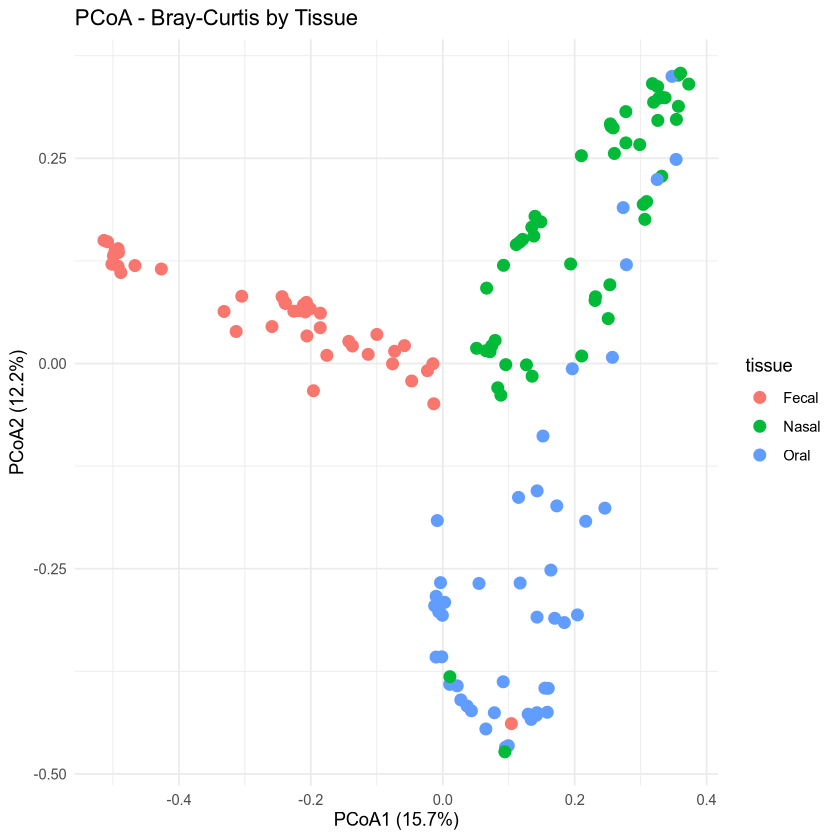

In [18]:
library(ggrepel)
ggplot(pcoa_df, aes(x = PCoA1, y = PCoA2, color = tissue)) +
  geom_point(size = 3) +
  theme_minimal() +
  labs(
    title = "PCoA - Bray-Curtis by Tissue",
    x = paste0("PCoA1 (", var_explained_1, "%)"),
    y = paste0("PCoA2 (", var_explained_2, "%)")
  ) 

Relative Abundance

Phylum stacked plots

In [19]:
# load ali_merged_counts.tsv
phylum_counts <- read.table("phylum_counts.tsv", sep="\t", header= TRUE, row.names=1, check.names=FALSE)


In [20]:
# Read metadata
metadata <- read.table("sample_metadata.tsv", sep="\t", header=TRUE)

# Check column names
head(metadata)
# Strip whitespace from sample names
metadata$sample <- str_trim(metadata$sample)

# Match sample names in metadata to those in the count table
colnames(phylum_counts) <- str_trim(colnames(phylum_counts))

sample_ids <- colnames(phylum_counts)
metadata_filtered <- metadata %>% filter(sample %in% sample_ids)

# Optional: check if any samples are missing
setdiff(sample_ids, metadata_filtered$sample)


,sample,donor,day,tissue,condition,data_origin,sex
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,garrett_1,g18,0,Fecal,Healthy,garrett,female
2,garrett_2,g17,0,Fecal,Healthy,garrett,male
3,garrett_3,g10,0,Fecal,FMT,garrett,female
4,garrett_4,g3,0,Fecal,FMT,garrett,female
5,garrett_5,g3,56,Fecal,FMT,garrett,female
6,garrett_6,g19,14,Fecal,Healthy,garrett,female


[1] "garrett_20" "garrett_73"

In [21]:
# Convert to long format
counts_long <- phylum_counts %>%
  as.data.frame() %>%
  rownames_to_column("Phylum") %>%
  pivot_longer(-Phylum, names_to = "sample", values_to = "Count")

# Join with metadata
counts_long <- counts_long %>%
  left_join(metadata_filtered, by = "sample")

# Check result
head(counts_long)

Phylum,sample,Count,donor,day,tissue,condition,data_origin,sex
<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
Uroviricota,25617X10,17895744,m26,14,Fecal,FMT,mary,male
Uroviricota,25617X11,19770,m26,56,Fecal,FMT,mary,male
Uroviricota,25617X12,278971,m31,0,Fecal,Healthy,mary,male
Uroviricota,25617X13,141937,m31,14,Fecal,Healthy,mary,male
Uroviricota,25617X14,83041,m32,0,Fecal,FMT,mary,female
Uroviricota,25617X15,1244,m33,0,Fecal,FMT,mary,male


In [22]:
counts_long <- counts_long %>%
  group_by(sample, tissue) %>%
  mutate(Total_Count = sum(Count)) %>%
  ungroup() %>%
  mutate(Relative_Abundance = Count / Total_Count) %>%
  select(-Total_Count)


In [23]:
counts_long <- counts_long %>%
  mutate(Relative_Abundance = Relative_Abundance * 100)

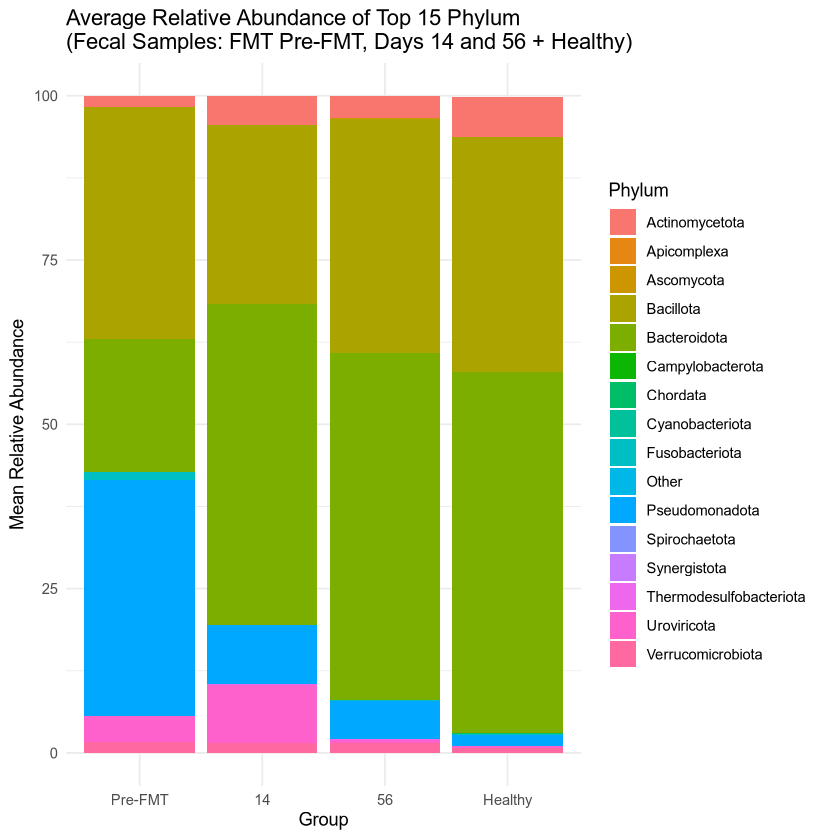

In [24]:
library(dplyr)
library(ggplot2)

# Step 1: Filter oral FMT samples (days 0, 14, 56)
Fecal_fmt <- counts_long %>%
  filter(tissue == "Fecal", condition == "FMT", day %in% c(0, 14, 56))

# Step 2: Identify top 15 genera in FMT oral samples
top15_genera <- Fecal_fmt %>%
  group_by(Phylum) %>%
  summarize(mean_abundance = mean(Relative_Abundance), .groups = "drop") %>%
  arrange(desc(mean_abundance)) %>%
  slice_head(n = 15) %>%
  pull(Phylum)

# Step 3: Label other genera as "Other"
Fecal_fmt <- Fecal_fmt %>%
  mutate(Phylum = ifelse(Phylum %in% top15_genera, Phylum, "Other"))

# Step 4: Average relative abundance per day for FMT
fmt_avg <- Fecal_fmt %>%
  group_by(day, Phylum) %>%
  summarize(mean_rel_abundance = mean(Relative_Abundance), .groups = "drop") %>%
  # Change the 'day' factor to "Pre-FMT" for day 0
  mutate(group = as.character(day)) %>%
  mutate(group = ifelse(group == "0", "Pre-FMT", group))

# Step 5: Process Healthy oral samples (only days 0 and 14)
Fecal_healthy <- counts_long %>%
  filter(tissue == "Fecal", condition == "Healthy", day %in% c(0, 14)) %>%
  mutate(Phylum = ifelse(Phylum %in% top15_genera, Phylum, "Other"))

# Step 6: Average relative abundance for combined Healthy group
healthy_avg <- Fecal_healthy %>%
  group_by(Phylum) %>%
  summarize(mean_rel_abundance = mean(Relative_Abundance), .groups = "drop") %>%
  mutate(group = "Healthy")

# Step 7: Combine FMT and Healthy data
combined_df <- bind_rows(fmt_avg %>% select(group, Phylum, mean_rel_abundance),
                         healthy_avg %>% select(group, Phylum, mean_rel_abundance))

# Step 8: Set group order for x-axis
combined_df$group <- factor(combined_df$group, levels = c("Pre-FMT", "14", "56", "Healthy"))

# Step 9: Plot
my_plot <- ggplot(combined_df, aes(x = group, y = mean_rel_abundance, fill = Phylum)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Average Relative Abundance of Top 15 Phylum\n(Fecal Samples: FMT Pre-FMT, Days 14 and 56 + Healthy)",
       x = "Group",
       y = "Mean Relative Abundance") +
  theme_minimal() 

my_plot

# 2. Use ggsave() to save the plot
ggsave("phylum_fecal_abundance_bar_chart.png", plot = my_plot, width = 8, height = 6, units = "in", bg = "white") 

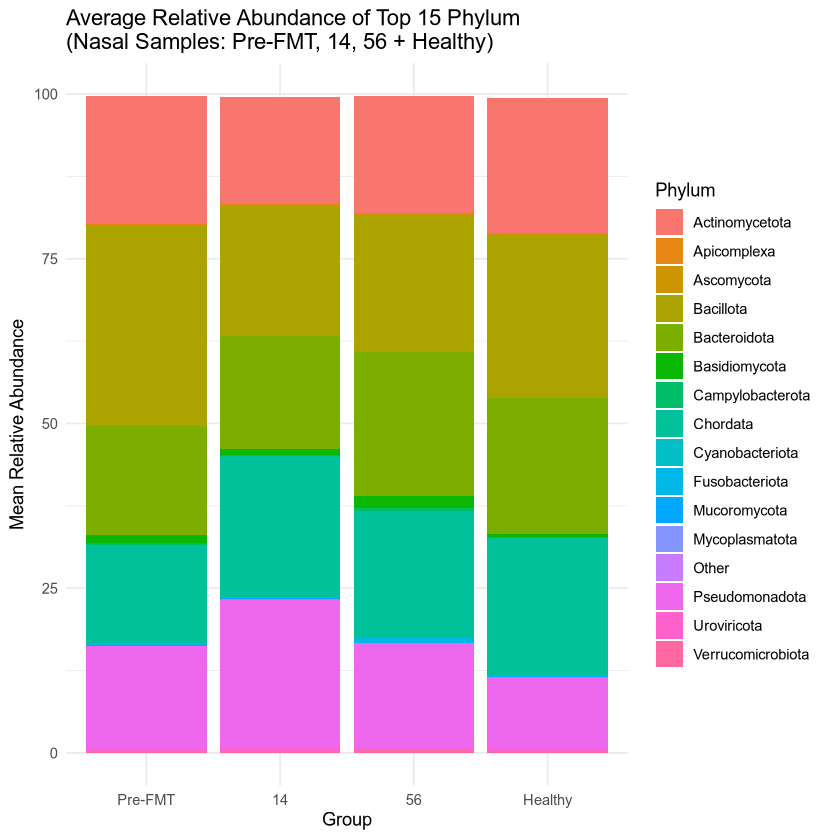

In [25]:
library(dplyr)
library(ggplot2)

# Step 1: Filter oral FMT samples (days 0, 14, 56)
Nasal_fmt <- counts_long %>%
  filter(tissue == "Nasal", condition == "FMT", day %in% c(0, 14, 56))

# Step 2: Identify top 15 genera in FMT oral samples
top15_genera <- Nasal_fmt %>%
  group_by(Phylum) %>%
  summarize(mean_abundance = mean(Relative_Abundance), .groups = "drop") %>%
  arrange(desc(mean_abundance)) %>%
  slice_head(n = 15) %>%
  pull(Phylum)

# Step 3: Label other genera as "Other"
Nasal_fmt <- Nasal_fmt %>%
  mutate(Phylum = ifelse(Phylum %in% top15_genera, Phylum, "Other"))

# Step 4: Average relative abundance per day for FMT
fmt_avg <- Nasal_fmt %>%
  group_by(day, Phylum) %>%
  summarize(mean_rel_abundance = mean(Relative_Abundance), .groups = "drop") %>%
  # Change the 'day' factor to "Pre-FMT" for day 0
  mutate(group = as.character(day)) %>%
  mutate(group = ifelse(group == "0", "Pre-FMT", group))

# Step 5: Process Healthy oral samples (only days 0 and 14)
Nasal_healthy <- counts_long %>%
  filter(tissue == "Nasal", condition == "Healthy", day %in% c(0, 14)) %>%
  mutate(Phylum = ifelse(Phylum %in% top15_genera, Phylum, "Other"))

# Step 6: Average relative abundance for combined Healthy group
healthy_avg <- Nasal_healthy %>%
  group_by(Phylum) %>%
  summarize(mean_rel_abundance = mean(Relative_Abundance), .groups = "drop") %>%
  mutate(group = "Healthy")

# Step 7: Combine FMT and Healthy data
combined_df <- bind_rows(fmt_avg %>% select(group, Phylum, mean_rel_abundance),
                         healthy_avg %>% select(group, Phylum, mean_rel_abundance))

# Step 8: Set group order for x-axis
combined_df$group <- factor(combined_df$group, levels = c("Pre-FMT", "14", "56", "Healthy"))

# Step 9: Plot
ggplot(combined_df, aes(x = group, y = mean_rel_abundance, fill = Phylum)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Average Relative Abundance of Top 15 Phylum\n(Nasal Samples: Pre-FMT, 14, 56 + Healthy)",
       x = "Group",
       y = "Mean Relative Abundance") +
  theme_minimal() 

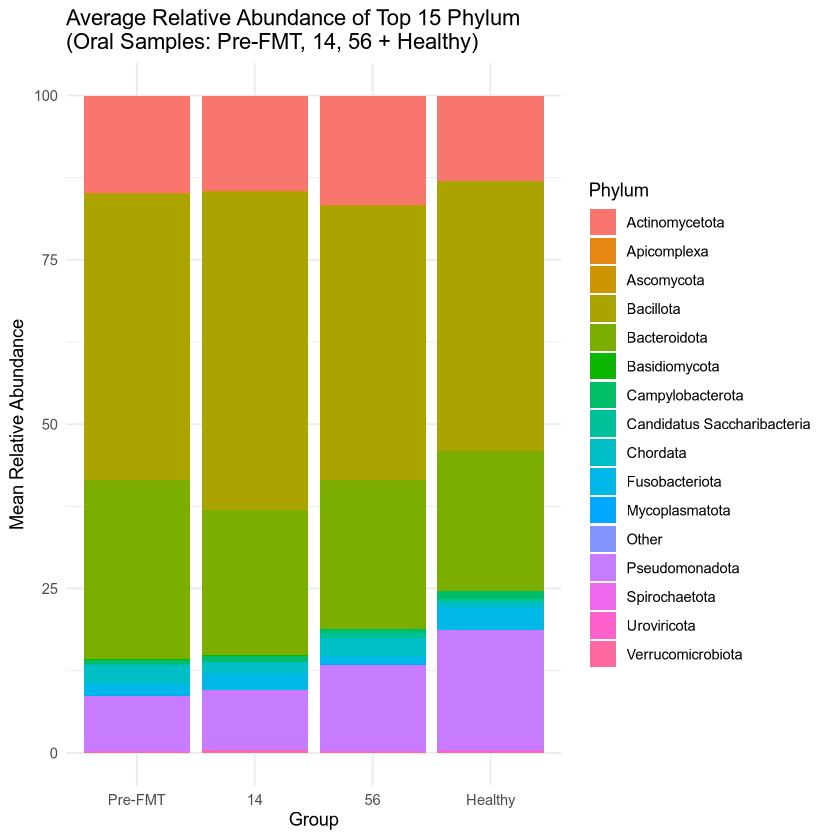

In [26]:
library(dplyr)
library(ggplot2)

# Step 1: Filter oral FMT samples (days 0, 14, 56)
Oral_fmt <- counts_long %>%
  filter(tissue == "Oral", condition == "FMT", day %in% c(0, 14, 56))

# Step 2: Identify top 15 genera in FMT oral samples
top15_genera <- Oral_fmt %>%
  group_by(Phylum) %>%
  summarize(mean_abundance = mean(Relative_Abundance), .groups = "drop") %>%
  arrange(desc(mean_abundance)) %>%
  slice_head(n = 15) %>%
  pull(Phylum)

# Step 3: Label other genera as "Other"
Oral_fmt <- Oral_fmt %>%
  mutate(Phylum = ifelse(Phylum %in% top15_genera, Phylum, "Other"))

# Step 4: Average relative abundance per day for FMT
fmt_avg <- Oral_fmt %>%
  group_by(day, Phylum) %>%
  summarize(mean_rel_abundance = mean(Relative_Abundance), .groups = "drop") %>%
  # Change the 'day' factor to "Pre-FMT" for day 0
  mutate(group = as.character(day)) %>%
  mutate(group = ifelse(group == "0", "Pre-FMT", group))

# Step 5: Process Healthy oral samples (only days 0 and 14)
Oral_healthy <- counts_long %>%
  filter(tissue == "Oral", condition == "Healthy", day %in% c(0, 14)) %>%
  mutate(Phylum = ifelse(Phylum %in% top15_genera, Phylum, "Other"))

# Step 6: Average relative abundance for combined Healthy group
healthy_avg <- Oral_healthy %>%
  group_by(Phylum) %>%
  summarize(mean_rel_abundance = mean(Relative_Abundance), .groups = "drop") %>%
  mutate(group = "Healthy")

# Step 7: Combine FMT and Healthy data
combined_df <- bind_rows(fmt_avg %>% select(group, Phylum, mean_rel_abundance),
                         healthy_avg %>% select(group, Phylum, mean_rel_abundance))

# Step 8: Set group order for x-axis
combined_df$group <- factor(combined_df$group, levels = c("Pre-FMT", "14", "56", "Healthy"))

# Step 9: Plot
ggplot(combined_df, aes(x = group, y = mean_rel_abundance, fill = Phylum)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Average Relative Abundance of Top 15 Phylum\n(Oral Samples: Pre-FMT, 14, 56 + Healthy)",
       x = "Group",
       y = "Mean Relative Abundance") +
  theme_minimal() 

In [27]:
# This script calculates alpha diversity metrics (Richness and Evenness)
# and plots their joint distribution using a 2D density plot.

library(tidyverse)
library(vegan)
library(ggplot2)

# Load the data
# Make sure these files are in the same directory as this script.
counts_df <- read.csv("ali_merged_counts.tsv", sep='\t', row.names = 1)
metadata_df <- read.csv("sample_metadata.tsv", sep='\t', row.names = 1)
# remove row garrett_82 from metadata_df
metadata_df <- metadata_df %>%
  filter(rownames(metadata_df) != "garrett_82")
# Clean up sample names to ensure perfect matching across files
colnames(counts_df) <- gsub("^X", "", colnames(counts_df))
colnames(counts_df) <- trimws(colnames(counts_df))
metadata_df$sample <- trimws(rownames(metadata_df))



# Make sure the row names of the metadata match the column names of the counts
rownames(metadata_df) <- metadata_df$sample
counts_all <- counts_df[, rownames(metadata_df)]

# Remove taxa with zero counts across all samples
counts_all <- counts_all[rowSums(counts_all) > 0, ]

# Transpose the counts data so rows are samples and columns are taxa
counts_all_t <- t(counts_all)


# --- Calculate Alpha Diversity Metrics ---

# Calculate Richness using the ACE estimator, and rename the column to 'ACE'
richness_ace <- estimateR(counts_all_t) %>%
  t() %>%
  as.data.frame() %>%
  rownames_to_column(var = "sample") %>%
  select(sample, ACE = S.ACE)

# Calculate Pielou's Evenness
evenness_pielou <- diversity(counts_all_t, index = "shannon") / log(specnumber(counts_all_t)) %>%
   as.data.frame() 
colnames(evenness_pielou)[1] <- "Pielou"
evenness_pielou$sample <- rownames(evenness_pielou)

# Combine alpha diversity metrics with metadata
alpha_diversity_df <- metadata_df %>%
  left_join(richness_ace, by = "sample") %>%
  left_join(evenness_pielou, by = 'sample')

# Convert the relevant columns to numeric before plotting to avoid errors
alpha_diversity_df$ACE <- as.numeric(alpha_diversity_df$ACE)
alpha_diversity_df$Pielou <- as.numeric(alpha_diversity_df$Pielou)

# --- Create and save the density plot ---
# The plot now shows the joint density of richness and evenness
p <- ggplot(alpha_diversity_df, aes(x = ACE, y = Pielou)) +
  # Add the contour lines to show density
  geom_density_2d(aes(color = tissue)) +
  # Add the individual points
  geom_point(alpha = 0.5) +
  labs(
    title = "Density Distribution of Microbiome Richness and Evenness",
    x = "Richness (ACE)",
    y = "Evenness (Pielou)"
  ) +
  theme_minimal()

# Save the plot
png("Alpha_Diversity_Density_Plot.png", width = 800, height = 800)
print(p)
dev.off()


agg_record_979328494 
                   2